# Steps To be Performed:-
- Load the Data
- Perform EDA on the dataset
- Data Preprocessing
- Model Building
- Model Evalution
- Model Deployment


 It contains the Features

 - 'Item_Identifier'
 - 'Item_Weight'
 - 'Item_Fat_Content'
 - 'Item_Visibility',
 - 'Item_Type'
 - 'Item_MRP',
 - 'Outlet_Identifier',
 - 'Outlet_Establishment_Year',
 - 'Outlet_Size',
 - 'Outlet_Location_Type',
 - 'Outlet_Type',
 - 'Item_Outlet_Sales'

In [1]:
#installing kaggle Library
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**Importing the Kaggle File**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


 **Big Mart Sales Prediction using Machine Learning**

In [3]:
!kaggle datasets download -d brijbhushannanda1979/bigmart-sales-data

Dataset URL: https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data
License(s): CC0-1.0
  0% 0.00/307k [00:00<?, ?B/s]
100% 307k/307k [00:00<00:00, 26.3MB/s]


In [4]:
!ls


bigmart-sales-data.zip	kaggle.json  sample_data


In [5]:
# Extracting the Compressed Dataset

from zipfile import ZipFile
dataset = '/content/bigmart-sales-data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done ! Extracted')

Done ! Extracted


### **Import the Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


from sklearn.metrics import r2_score,mean_squared_error

In [8]:
import warnings
warnings.filterwarnings('ignore')

### **Load the Data**

In [9]:
#Load the Data
bigmart_data = pd.read_csv('/content/Train.csv')

In [10]:
##Print the Sample of data
bigmart_data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5520,FDU45,15.60,Regular,0.035506,Snack Foods,112.4518,OUT046,1997,Small,Tier 1,Supermarket Type1,3301.7022
2284,FDB20,7.72,Low Fat,0.051937,Fruits and Vegetables,77.9986,OUT013,1987,High,Tier 3,Supermarket Type1,934.7832
5916,NCE18,10.00,Low Fat,0.021513,Household,247.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2,3745.1250
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
7923,FDZ56,NaN,Low Fat,0.045062,Fruits and Vegetables,167.5474,OUT019,1985,Small,Tier 1,Grocery Store,1010.6844


In [11]:
##print the shape
bigmart_data.shape

(8523, 12)

In [12]:
#columns
bigmart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [14]:
#Checking for the Misisng Values
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have the Missing values in the Dataset so,we will Handle the Missing values
- Mean -> Average
- Mode -> More Repeated Value

- **Filling the Missing values in "Item_Weight" with the "Mean" Value**

In [15]:
##Mena value of the "Item_Weight" column
bigmart_data['Item_Weight'].mean()

12.857645184135976

In [16]:
#"item_Weight"
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(),inplace = True)

In [17]:
# Calculate the mode of the 'Outlet_Size' column
outlet_size_mode = bigmart_data['Outlet_Size'].mode()[0]
outlet_size_mode

'Medium'

In [18]:
##So,Medium is repeating more in the "Outlet_Size" this colum
##we will replace the null/missing values with mode
bigmart_data['Outlet_Size'].fillna(outlet_size_mode,inplace =True)

In [19]:
##Now check agin the missing values for 'Item_Weight'
bigmart_data['Item_Weight'].isnull().sum()

0

In [20]:
bigmart_data['Outlet_Size'].isnull().sum()

0

In [21]:
##Check for all Columns
#Checking for the Misisng Values
bigmart_data.isnull().sum()
#So, we have handleded the missing vales

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [22]:
##DEscribe the Data
bigmart_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.857645,4.226124,4.555,9.310000,12.857645,16.000000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [23]:
numeric_features = bigmart_data.select_dtypes(exclude = 'object')
numeric_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [24]:
numeric_features.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

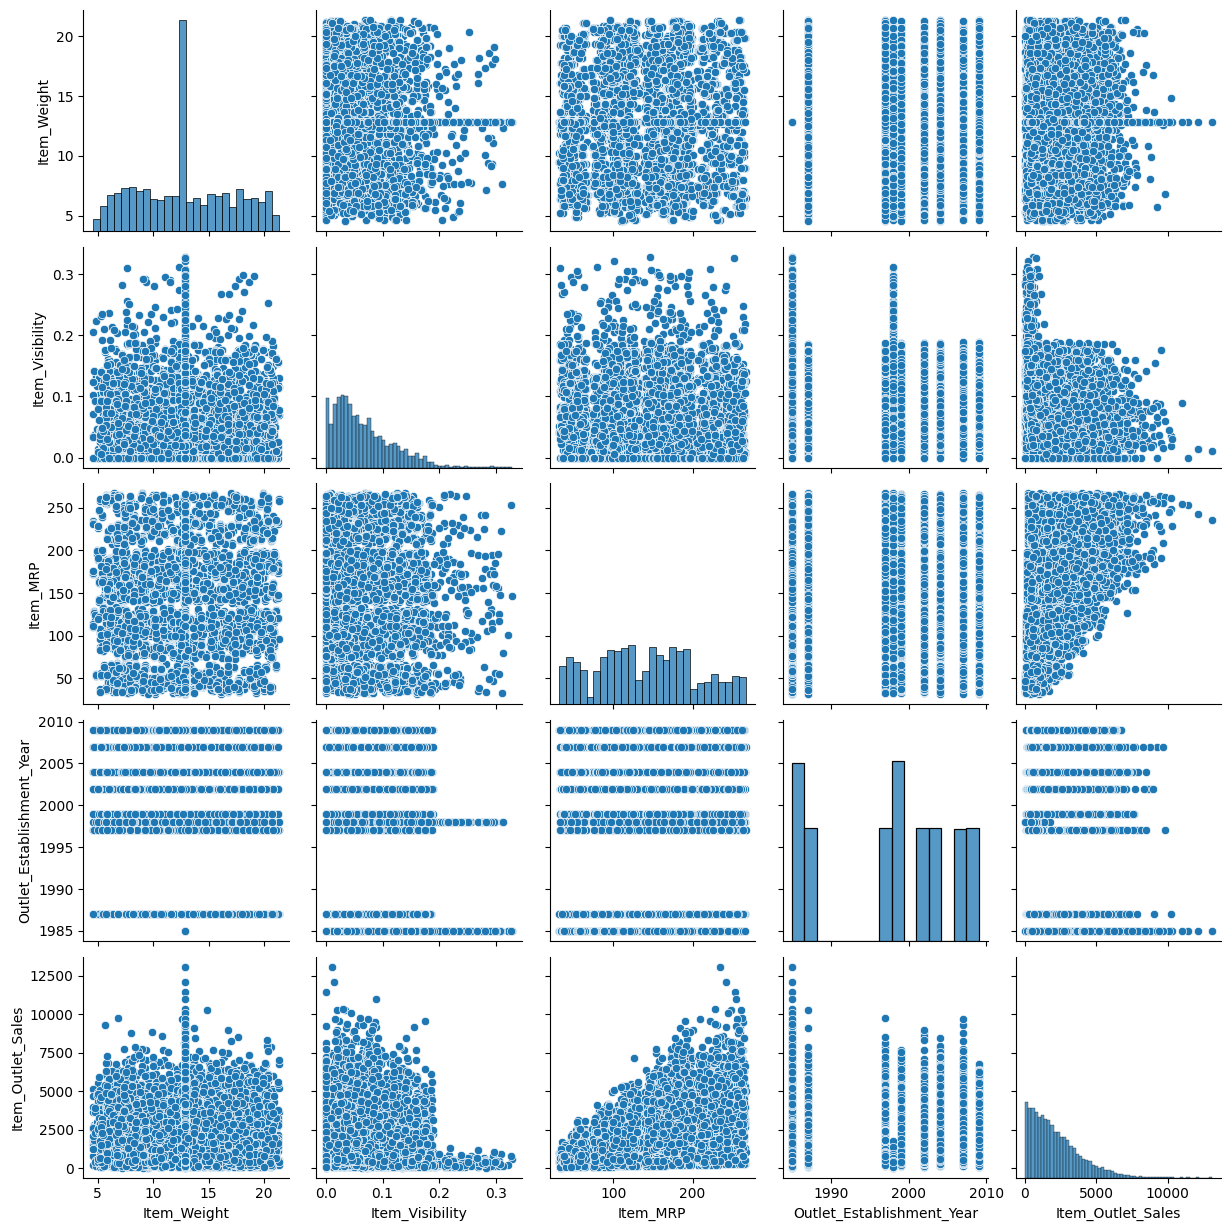

In [25]:
sns.pairplot(bigmart_data)

- **Distplot:** When you want to visualize the distribution of a continuous variable and understand its shape, including the probability density.

In [26]:
numeric_features.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

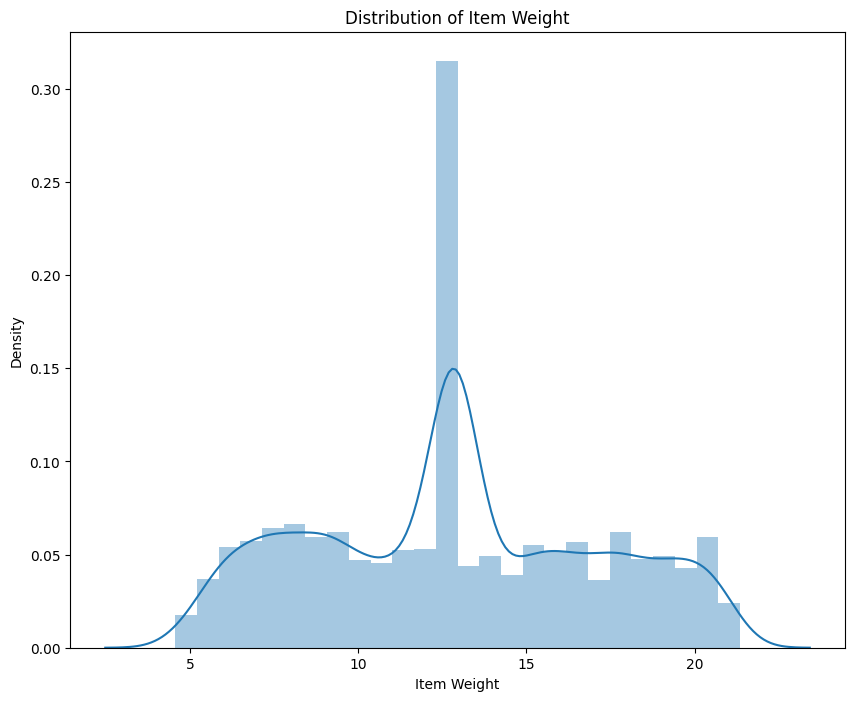

In [27]:
##Visulaize the Item_Weight Distribution
plt.figure(figsize=(10, 8))
sns.distplot(bigmart_data['Item_Weight'])
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.show()

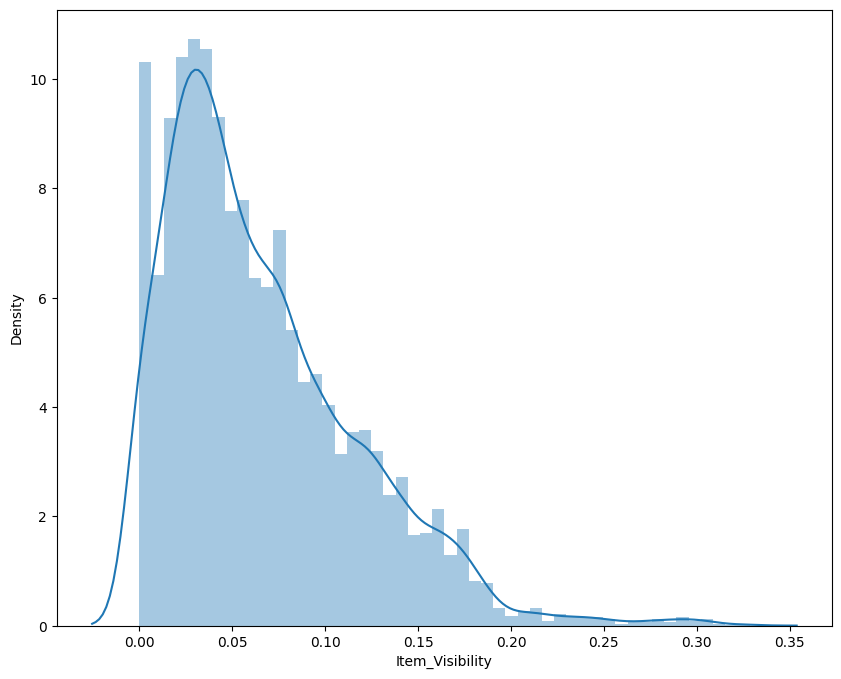

In [28]:
#Visulaize the Item Visibility Distribution
plt.figure(figsize = (10,8))
sns.distplot(bigmart_data['Item_Visibility'])
plt.xlabel('Item_Visibility')
plt.ylabel('Density')
plt.show()

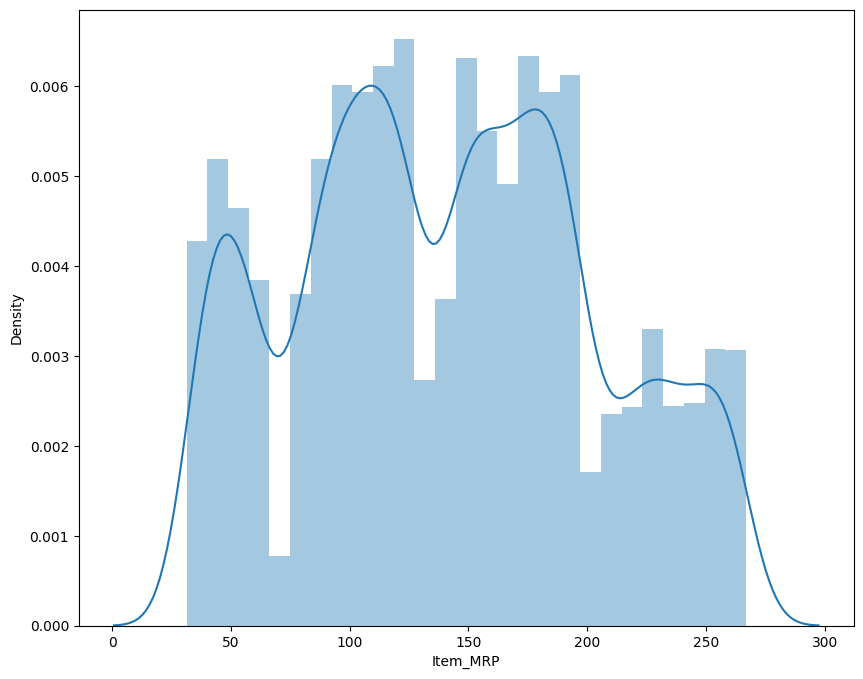

In [29]:
###Visulaize the Item_MRP
plt.figure(figsize=(10,8))
sns.distplot(bigmart_data['Item_MRP'])
plt.show()



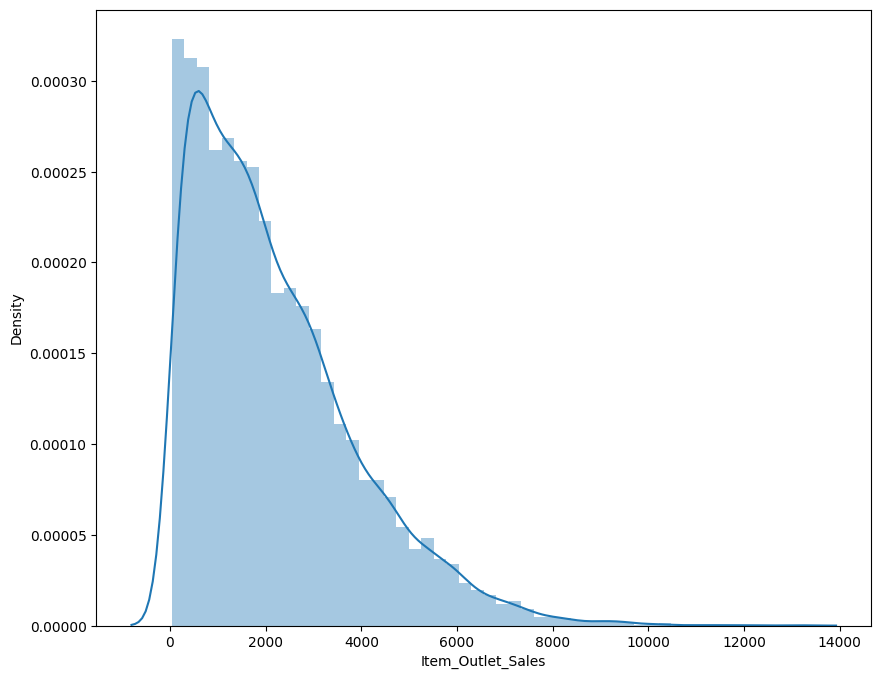

In [30]:
###Visulaize the Item_Outlet_Sales
plt.figure(figsize=(10,8))
sns.distplot(bigmart_data['Item_Outlet_Sales'])
plt.show()


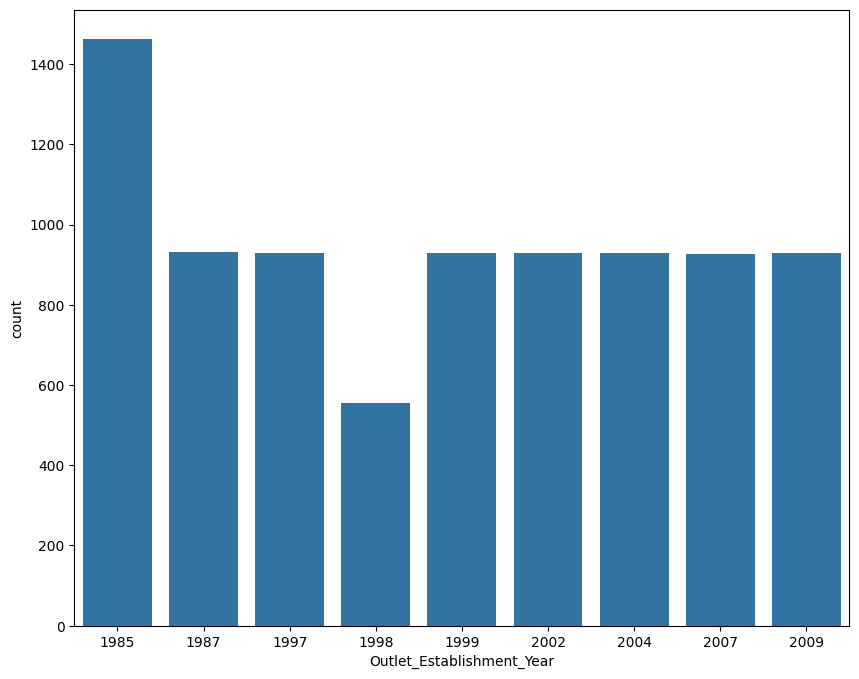

In [31]:
##Outlet_Establishmnet_Year Column
plt.figure(figsize = (10,8))
sns.countplot(x = 'Outlet_Establishment_Year',data = bigmart_data)
plt.show()


**Categorical Features**

In [32]:
categorical_features = bigmart_data.select_dtypes(include = 'object')
categorical_features.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [33]:
bigmart_data.shape

(8523, 12)

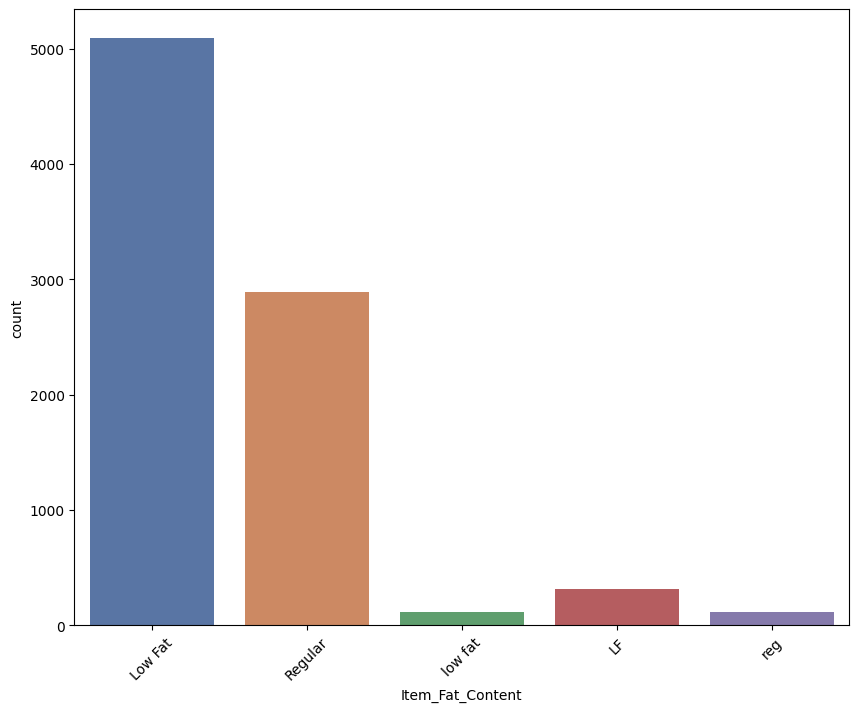

In [34]:
### Count plot for Item_Fat_Content
plt.figure(figsize = (10,8))
#color palette with more colors
palette = sns.color_palette("deep")
sns.countplot(x = 'Item_Fat_Content',data = bigmart_data, palette=palette)
plt.xticks(rotation=45)
plt.show()


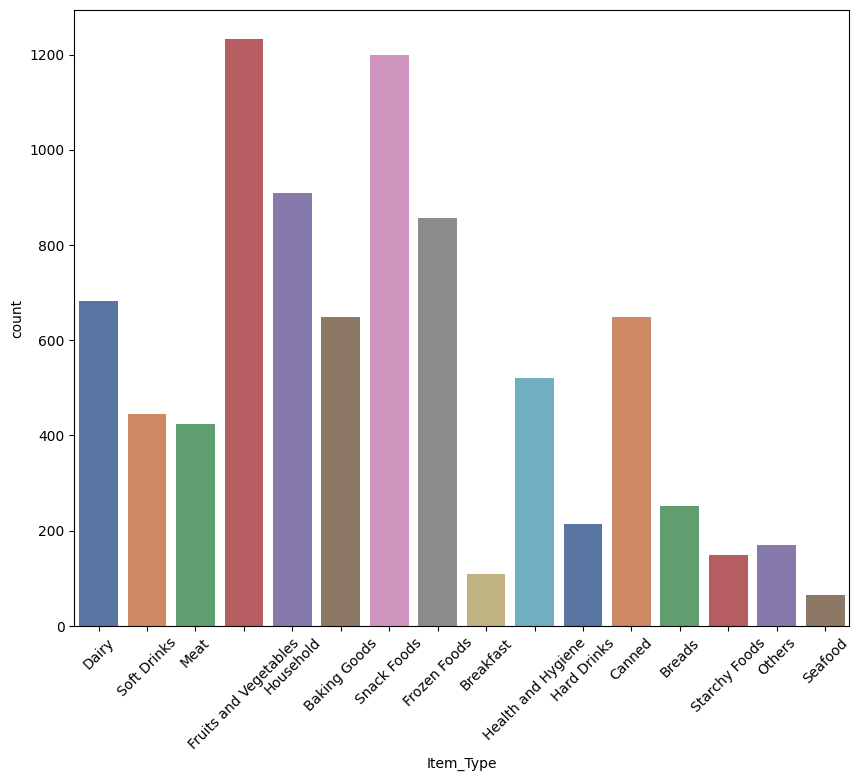

In [35]:
### Count plot for Item_Type
plt.figure(figsize = (10,8))
#color palette with more colors
palette = sns.color_palette("deep")
sns.countplot(x="Item_Type", data=bigmart_data, palette=palette)
plt.xticks(rotation=45)
plt.show()


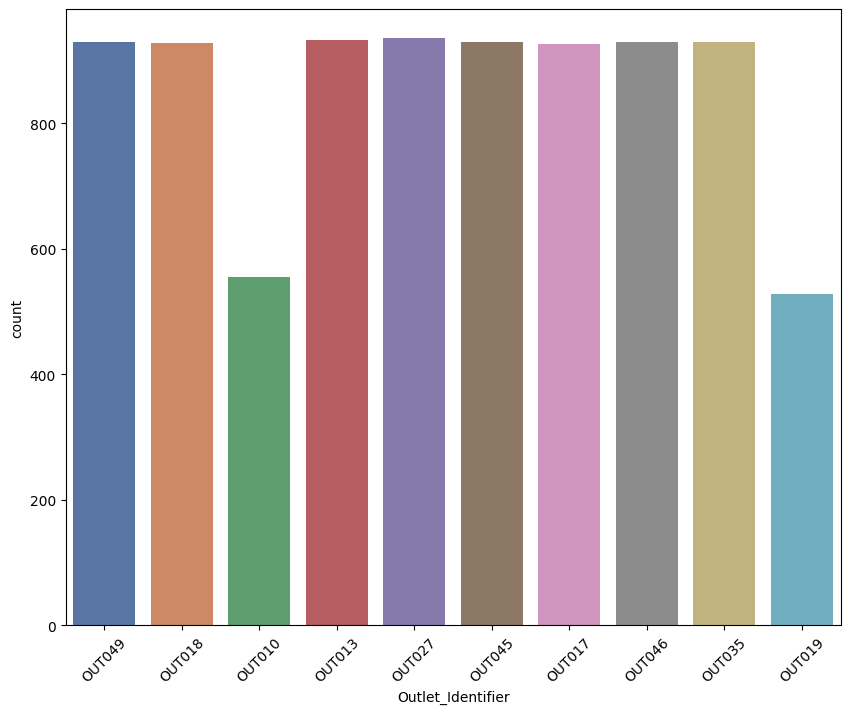

In [36]:
### Count plot for Outlet_Identifier
plt.figure(figsize = (10,8))
#color palette with more colors
palette = sns.color_palette("deep")
sns.countplot(x="Outlet_Identifier", data=bigmart_data, palette=palette)
plt.xticks(rotation=45)
plt.show()


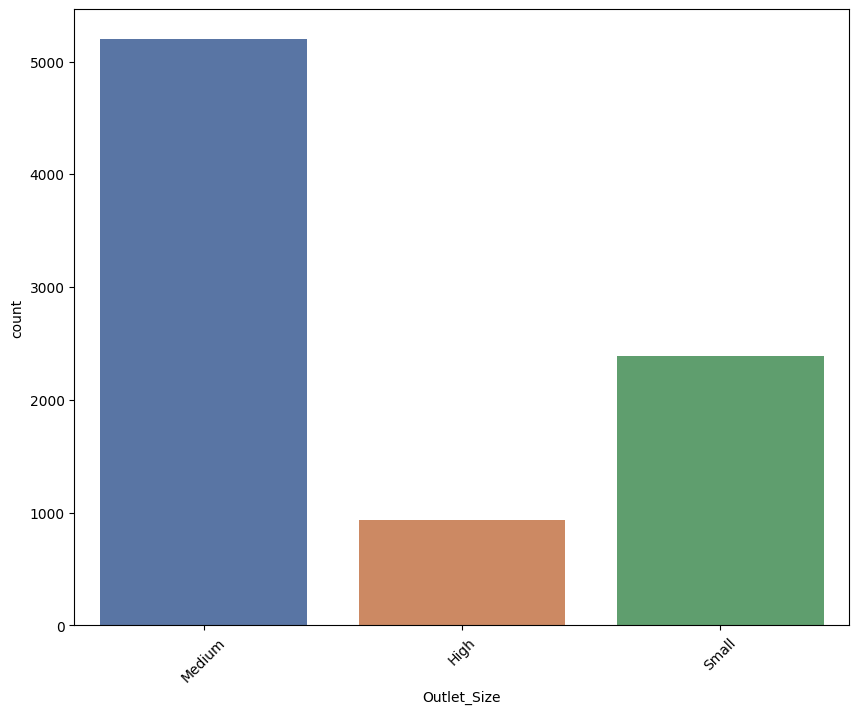

In [37]:
#### Count plot for Outlet_Size
plt.figure(figsize = (10,8))
#color palette with more colors
palette = sns.color_palette("deep")
sns.countplot(x="Outlet_Size", data=bigmart_data, palette=palette)
plt.xticks(rotation=45)
plt.show()

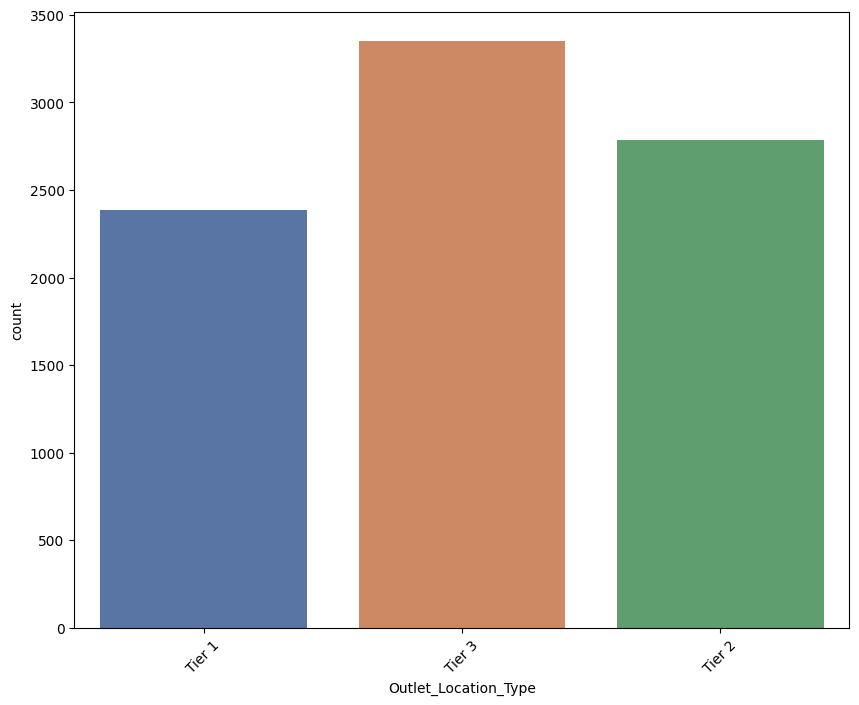

In [38]:
## Count plot for Outlet_Location_Type
plt.figure(figsize = (10,8))
#color palette with more colors
palette = sns.color_palette("deep")
sns.countplot(x="Outlet_Location_Type", data=bigmart_data, palette=palette)
plt.xticks(rotation=45)
plt.show()

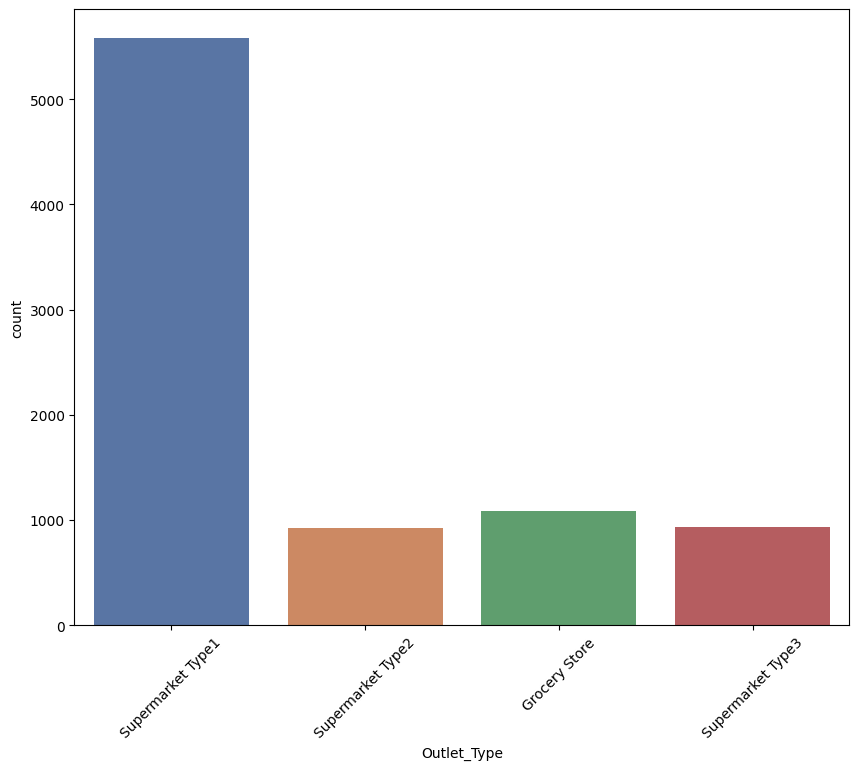

In [39]:
## Count plot for Outlet_Type
plt.figure(figsize = (10,8))
#color palette with more colors
palette = sns.color_palette("deep")
sns.countplot(x="Outlet_Type", data=bigmart_data, palette=palette)
plt.xticks(rotation=45)
plt.show()

In [43]:
##Correlation Matrix
plt.figure(figsize=(12,8))
sns.set()
sns.heatmap(bigmart_data.corr(),annot=True)

### **Data PreProcessing**

In [44]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:

bigmart_data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [46]:
bigmart_data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [47]:
bigmart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [48]:
bigmart_data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace = True)

In [49]:
##Check the Distribution after
bigmart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [50]:
categorical_features.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### **Label Encoding**

In [51]:
encoder = LabelEncoder()

- Apply the Label Encoder for the Every Column

In [52]:
bigmart_data['Item_Fat_Content'] = encoder.fit_transform(bigmart_data['Item_Fat_Content'])

In [53]:
bigmart_data['Item_Identifier'] = encoder.fit_transform(bigmart_data['Item_Identifier'])

In [54]:
bigmart_data['Item_Type'] = encoder.fit_transform(bigmart_data['Item_Type'])

In [55]:
bigmart_data['Outlet_Identifier'] = encoder.fit_transform(bigmart_data['Outlet_Identifier'])

In [56]:
bigmart_data['Outlet_Size'] = encoder.fit_transform(bigmart_data['Outlet_Size'])

In [57]:
bigmart_data['Outlet_Location_Type'] = encoder.fit_transform(bigmart_data['Outlet_Location_Type'])

In [58]:
bigmart_data['Outlet_Type'] = encoder.fit_transform(bigmart_data['Outlet_Type'])

In [59]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [60]:
bigmart_data.shape

(8523, 12)

### **Split th Data into Depnedent and Independent Features**

In [61]:
X = bigmart_data.drop(columns = 'Item_Outlet_Sales',axis = 1) #depndent feature
y = bigmart_data['Item_Outlet_Sales'] #independet feature

In [62]:
pd.DataFrame(X)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [63]:
pd.DataFrame(y)

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


### **Model Building**

In [64]:
##TRain test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 54)


In [65]:
print("the Shape of X :-",X.shape)
print("the Shape of X_train :-", X_train.shape)
print("the Shape of X_test :-", X_test.shape)

the Shape of X :- (8523, 11)
the Shape of X_train :- (6818, 11)
the Shape of X_test :- (1705, 11)


In [66]:
print("the Shape of y :-",y.shape)
print("the Shape of y_train :-", y_train.shape)
print("the Shape of y_test :-", y_test.shape)

the Shape of y :- (8523,)
the Shape of y_train :- (6818,)
the Shape of y_test :- (1705,)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error




In [68]:
#Create a list of the models
models = [
    ("Linear Regression",LinearRegression()),
    ("K-Nearest Neighbors",KNeighborsRegressor()),
    ("Random Forest",RandomForestRegressor()),
    ("AdaBoost",AdaBoostRegressor()),
    ("Gradient Boosting",GradientBoostingRegressor()),
    ("XGBoost",XGBRegressor())

]

In [69]:
results = {} #save the model result in it
for name,model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  #Find the metrices using the mean Squre error
  #Print the
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  R2_Score = r2_score(y_pred,y_test)
  results[name]= {"MSE":mse,"RMSE":rmse,"R2_score":R2_Score} #Store MSE for each model in dictionary




In [70]:
results

{'Linear Regression': {'MSE': 1458090.8723380286,
  'RMSE': 1207.5143362867493,
  'R2_score': -0.006687321716873473},
 'K-Nearest Neighbors': {'MSE': 2389964.806932003,
  'RMSE': 1545.9511010804977,
  'R2_score': -0.9971627859534926},
 'Random Forest': {'MSE': 1338644.5554163752,
  'RMSE': 1156.9980792621807,
  'R2_score': 0.29768526993130295},
 'AdaBoost': {'MSE': 1401346.9190828288,
  'RMSE': 1183.7849969833326,
  'R2_score': 0.15003038863024953},
 'Gradient Boosting': {'MSE': 1183897.6901365258,
  'RMSE': 1088.070627365947,
  'R2_score': 0.30269065235004644},
 'XGBoost': {'MSE': 1472182.8900650416,
  'RMSE': 1213.3354400432888,
  'R2_score': 0.2542467244182859}}

In [71]:
#Create ad Data frame from the results
df = pd.DataFrame(results).T
df

,MSE,RMSE,R2_score
Linear Regression,1.458091e+06,1207.514336,-0.006687
K-Nearest Neighbors,2.389965e+06,1545.951101,-0.997163
Random Forest,1.338645e+06,1156.998079,0.297685
AdaBoost,1.401347e+06,1183.784997,0.150030
Gradient Boosting,1.183898e+06,1088.070627,0.302691
XGBoost,1.472183e+06,1213.335440,0.254247


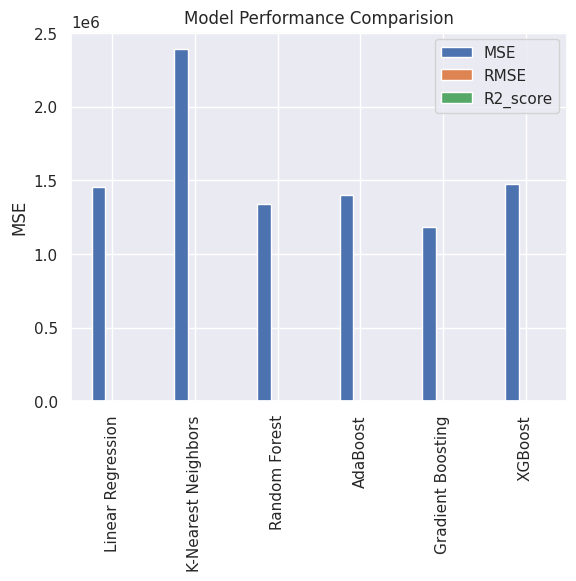

In [72]:
##Plot the Result
df.plot(kind ='bar')
plt.title('Model Performance Comparision')
plt.ylabel('MSE')
plt.show()

- Gradient Boosting has the lowest MSE, indicating it's the best performing model among all the Model.

**Key Metrics Comparison:**

- Mean Squared Error (MSE):
  - Lower MSE indicates better performance.
  - Gradient Boosting has the lowest MSE: 1.184857e+06.

- Root Mean Squared Error (RMSE):
  - Lower RMSE indicates better performance.
  - Gradient Boosting has the lowest RMSE: 1088.511420.

- R-squared (R²):
  - R² indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
  - Higher R² indicates better performance..
  - Gradient Boosting has the highest R²: 0.302857.



- Gradient Boosting has the lowest MSE and RMSE, indicating that it has the best fit in terms of minimizing errors.

- It also has the highest R² score among the models,  it measn that explains the largest proportion of the variance in the target variable.

### **Hyperparameter Tuning:**

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


- n_estimators:

The number of boosting stages (trees) to be run.  it is the number of trees to be built.
Values: [100, 200, 300] - The model will be evaluated with 100, 150, and 200 trees respectively.

- learning_rate:

The learning rate shrinks the contribution of each tree by the provided value. This is a trade-off between the number of trees and learning rate.
Values: [0.01, 0.1, 0.2] - The model will be evaluated with learning rates of 0.01, 0.1, and 0.2.

- max_depth:

Description: The maximum depth of the individual trees.
Limiting the depth of the tree helps prevent overfitting.
Values: [3, 4, 5] - The model will be evaluated with maximum tree depths of 3, 4, and 5.

- min_samples_split:

Description: The minimum number of samples required to split an internal node. This hyperparameter helps control overfitting.
Values: [2, 5, 10] - The model will be evaluated with minimum samples split set to 2, 5, and 10.

In [77]:
#Define the model and trhe parameters to Search
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators':[100,150,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5],
    'min_samples_split':[2,5,10]
}

In [78]:
###GridSearchCv
grid_search_cv = GridSearchCV(estimator = model,param_grid = param_grid,cv =5,n_jobs = -1 )
##Fit the Grid Search
grid_search_cv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]})

In [79]:
#Print the best Parametrs
print("Best Parameters:-",grid_search_cv.best_params_)

Best Parameters:- {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [80]:
##Print the Best Score
print("Best Score:-",grid_search_cv.best_score_)

Best Score:- 0.5858363815412667


In [81]:
##Best estimators
best_model = grid_search_cv.best_estimator_

In [95]:
best_model

GradientBoostingRegressor()

In [98]:
grid_search_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [99]:
best_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [100]:
##Predict on the test set
y_pred = best_model.predict(X_test)


In [101]:
#Calulate MSE
mse = mean_squared_error(y_test,y_pred)

In [102]:
#Calculate RMSE
rmse = np.sqrt(mse)

In [103]:
#Calculate R2
r2 = r2_score(y_test,y_pred)

In [104]:
##Print the Results:
print(f"MSE:{mse}")
print(f"RMSE:{rmse}")
print(f"R2:{r2}")
'''
 'Gradient Boosting': {'MSE': 1183897.6901365258,
  'RMSE': 1088.070627365947,
  'R2_score': 0.30269065235004644},
  '''

MSE:1184016.3415781332
RMSE:1088.1251497774201
R2:0.6131239184683067


" \n 'Gradient Boosting': {'MSE': 1183897.6901365258,\n  'RMSE': 1088.070627365947,\n  'R2_score': 0.30269065235004644},\n  "

In [106]:
#Save the model
from joblib import dump, load

# Save the model
dump(best_model, 'Best_model_GB.joblib')

# Load the model
best_model = load('Best_model_GB.joblib')


In [107]:
import sklearn
print(sklearn.__version__)


1.2.2
